In [1]:
# Painting vs. Photo Project - Classification with Convolutional Neural Network (Keras)
# Dataset source: https://www.kaggle.com/iiplutocrat45ii/painting-vs-photograph-classification-dataset

In [2]:
# Connect with Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Load files from Google Drive
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Paint_vs_Photo.zip", 'r')
zip_ref.extractall('/content/Paint_vs_Photo')
zip_ref.close()

In [4]:
# Directories

import os 

# Raw data / entire dataset
train_raw_paint_dir = os.path.join("/content/Paint_vs_Photo/RawData/painting")
train_raw_photo_dir = os.path.join("/content/Paint_vs_Photo/RawData/photos")

# Splitted into training / test / validation dataset
train_paint_dir = os.path.join("/content/Paint_vs_Photo/train/painting")
train_photo_dir = os.path.join("/content/Paint_vs_Photo/train/photos")

valid_paint_dir = os.path.join("/content/Paint_vs_Photo/valid/painting")
valid_photo_dir = os.path.join("/content/Paint_vs_Photo/valid/photos")

In [6]:
# Number of items in each dataset (directory)

print("Train_raw total - paintings:", len(os.listdir(train_raw_paint_dir)))
print("Train_raw total - photos:", len(os.listdir(train_raw_photo_dir)))
print("Train total - paintings:", len(os.listdir(train_paint_dir)))
print("Train total - photos:", len(os.listdir(train_photo_dir)))
print("Valid total - paintings:", len(os.listdir(valid_paint_dir)))
print("Valid total - photos:", len(os.listdir(valid_photo_dir)))

Train_raw total - paintings: 1361
Train_raw total - photos: 3747
Train total - paintings: 3513
Train total - photos: 3528
Valid total - paintings: 1505
Valid total - photos: 1505


In [7]:
# Display some examples 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


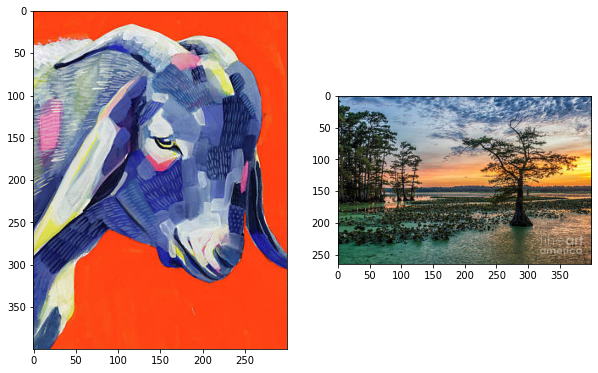

In [8]:
train_paint_names = os.listdir(train_paint_dir)
train_photo_names = os.listdir(train_photo_dir)

#fig = plt.gcf()
#fig.set_size_inch(10,10) 
fig = plt.subplots(figsize=(10,10))

plt.subplot(121)
file_dir_paint = os.path.join(train_paint_dir, train_paint_names[10])
img_paint = mpimg.imread(file_dir_paint)
imgplot = plt.imshow(img_paint)

plt.subplot(122)
file_dir_photo = os.path.join(train_photo_dir, train_photo_names[10])
img_photo = mpimg.imread(file_dir_photo)
imgplot = plt.imshow(img_photo)

plt.show()

#train_paint_example = [os.path.join(train_paint_dir, fname)
#                       for fname in train_paint_names[0:3]]

In [ ]:
#train_paint_names[0]
#img_photo.shape

In [9]:
# Check the file parameters (size & color scale)

# Training dataset
# Paintings

train_paint_shape=[]
for fname in train_paint_names:
  file_dir_paint = os.path.join(train_paint_dir, fname)
  img_paint = mpimg.imread(file_dir_paint)
  img_paint_shape = img_paint.shape
  train_paint_shape.append(img_paint_shape)   

# Photos

train_photo_shape=[]
for fname in train_photo_names:
  file_dir_photo = os.path.join(train_photo_dir, fname)
  img_photo = mpimg.imread(file_dir_photo)
  img_photo_shape = img_photo.shape
  train_photo_shape.append(img_photo_shape)


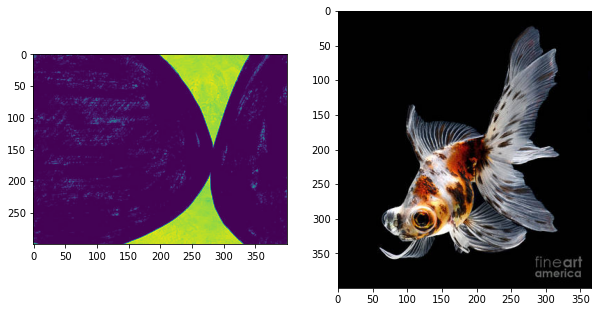

In [10]:
# Validation dataset

valid_paint_names = os.listdir(valid_paint_dir)
valid_photo_names = os.listdir(valid_photo_dir)

#fig = plt.gcf()
#fig.set_size_inch(10,10) 
fig = plt.subplots(figsize=(10,10))

plt.subplot(121)
file_dir_paint_valid = os.path.join(valid_paint_dir, valid_paint_names[10])
img_paint_valid = mpimg.imread(file_dir_paint_valid)
imgplot_valid = plt.imshow(img_paint_valid)

plt.subplot(122)
file_dir_photo_valid = os.path.join(valid_photo_dir, valid_photo_names[10])
img_photo_valid = mpimg.imread(file_dir_photo_valid)
imgplot_valid = plt.imshow(img_photo_valid)

plt.show()



In [11]:
# Paintings

valid_paint_shape=[]
for fname in valid_paint_names:
  file_dir_paint_valid = os.path.join(valid_paint_dir, fname)
  img_paint_valid = mpimg.imread(file_dir_paint_valid)
  img_paint_valid_shape = img_paint_valid.shape
  valid_paint_shape.append(img_paint_valid_shape)   

# Photos

valid_photo_shape=[]
for fname in valid_photo_names:
  file_dir_photo_valid = os.path.join(valid_photo_dir, fname)
  img_photo_valid = mpimg.imread(file_dir_photo_valid)
  img_photo_valid_shape = img_photo_valid.shape
  valid_photo_shape.append(img_photo_valid_shape)

In [ ]:
# Check the picture size 

set(train_paint_shape)
# (max/min, max/min) -> (96/400, 80/400) -> some items without the number of channels! (grayscale? RGB?)

#set(train_photo_shape)
# (max/min, max/min) -> (108/400, 237/400) -> some items without the number of channels! (grayscale? RGB?)

#set(valid_photo_shape)
# (max/min, max/min) -> (117/400, 205/400) -> some items without the number of channels! (grayscale? RGB?)

#set(valid_paint_shape)
# (max/min, max/min) -> (130/400, 80/400) -> some items without the number of channels! (grayscale? RGB?)

#len(set(train_paint_shape)) / list(set(train_paint_shape))

In [ ]:
### Questions:

# For resizing: What is the best size for the pictures? Something in the middle?
# RGB / Grayscale: Can pictures/photos without the information about the number of channels stay in the dataset?
#  -> If they should be removed from the dataset, then create a new function to select those files and drop them from the dataset

In [13]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [23]:
# Data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale data

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# other parameters: 
#   shear_range=0.2,
#   zoom_range=0.2,
#   horizontal_flip=True

train_generator = train_datagen.flow_from_directory(
    "/content/Paint_vs_Photo/train/",
    target_size=(250,250),
    batch_size=128,   #32
    class_mode="binary"
)

valid_generator = valid_datagen.flow_from_directory(
    "/content/Paint_vs_Photo/valid/",
    target_size=(250,250),
    batch_size=128,   #32;  batch size = number of training examples in one forward/backward pass.
    class_mode="binary"
)

# target_size: 250x250 -> value ca. in the middle of the range of all files

Found 7041 images belonging to 2 classes.
Found 3010 images belonging to 2 classes.


In [24]:
# Create a model

model = tf.keras.models.Sequential([
       # 1st convolution, 250x250x3 -> desired size of the image, 3 bytes RGB color pictures
       tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(250,250,3)),
       tf.keras.layers.MaxPooling2D(2,2),
       # 2nd convolution
       tf.keras.layers.Conv2D(32, (3,3), activation="relu"), 
       tf.keras.layers.MaxPooling2D(2,2),  
        # 3rd convolution
       tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
       tf.keras.layers.MaxPooling2D(2,2),
        # 4th convolution
       tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
       tf.keras.layers.MaxPooling2D(2,2),
        # 5th convolution
       tf.keras.layers.Conv2D(64, (3,3), activation="relu"), 
       tf.keras.layers.MaxPooling2D(2,2),
       # Flatten the results
       tf.keras.layers.Flatten(),
       # Set number of the hidden layers
       tf.keras.layers.Dense(512, activation="relu"),
       # Output layer, 1 neuron and sigmoid function due to binary classification
       tf.keras.layers.Dense(1, activation="sigmoid")
])

# Sigmoid activation function - good choice for binary classification problems
# Output is a scalar between 0 and 1, encoding the probability that the current image is class 1

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 86, 86, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 84, 84, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64)       

In [21]:
# Specifications for the training

from tensorflow.keras.optimizers import RMSprop

# RMSprop (as well as Adam & Adamgrad) adapts the learning rate during training
# Unlikely the stochastic gradient descent (SGD)

model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=["accuracy"])

# binary classification -> "binary_crossentropy"
# lr = learning rate = 0.001

In [123]:
#train_steps_epoch = len(train_paint_names) + len(train_photo_names)
#val_steps = len(valid_photo_names) + len(valid_paint_names)

In [ ]:
# Train the model

history = model.fit(train_generator,
                    steps_per_epoch=12,  # 8,  #Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
                    epochs=15,
                    verbose=1,
                    validation_data = valid_generator,
                    validation_steps=12)  #8

In [ ]:
# Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 35205 batches). You may need to use the repeat() function when building your dataset.

In [148]:
history.history

{'accuracy': [0.5279948115348816,
  0.6100260615348816,
  0.599609375,
  0.6100260615348816,
  0.6380208134651184,
  0.6555989384651184,
  0.6969481706619263,
  0.6575520634651184,
  0.6868489384651184,
  0.623046875,
  0.6790364384651184,
  0.6868489384651184,
  0.71484375,
  0.6884315013885498,
  0.7259114384651184],
 'loss': [0.773794949054718,
  0.6698184609413147,
  0.6771208643913269,
  0.6577709317207336,
  0.664531409740448,
  0.6312013268470764,
  0.6248250603675842,
  0.6278244853019714,
  0.5893686413764954,
  0.642788827419281,
  0.5999470353126526,
  0.6326554417610168,
  0.5707328915596008,
  0.6002513766288757,
  0.5468997955322266],
 'val_accuracy': [0.5143229365348816,
  0.6315104365348816,
  0.6106770634651184,
  0.6640625,
  0.6751301884651184,
  0.6783854365348816,
  0.65234375,
  0.6875,
  0.5442708134651184,
  0.6744791865348816,
  0.6809895634651184,
  0.69921875,
  0.7200520634651184,
  0.7076823115348816,
  0.72265625],
 'val_loss': [0.6860738396644592,
  0.640

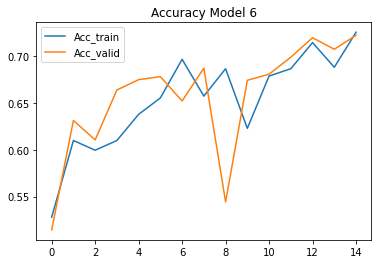

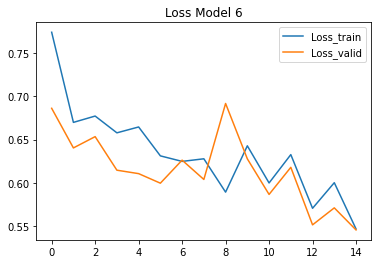

In [149]:
# Plot accuracies (training & validation)

plt.plot(history.history["accuracy"], label="Acc_train")
plt.plot(history.history["val_accuracy"], label="Acc_valid")
plt.legend()
plt.title("Accuracy Model 6")
plt.show()

# Plot accuracies (training & validation)

plt.plot(history.history["loss"], label="Loss_train")
plt.plot(history.history["val_loss"], label="Loss_valid")
plt.legend()
plt.xlabel("Epoch")
plt.title("Loss Model 6")
plt.show()

# Model 6: batch size = 128, 6 convolutional layers, hidden layers = 512, target size =250x250, 
# steps per epoch = 12, validation steps = 12, epochs = 15

# accuracy = 0.7259114384651184
# val_accuracy = 0.72265625

In [ ]:
# The best model so far: 
# Model 6: batch size = 128, 6 convolutional layers, hidden layers = 512, target size =250x250, 
# steps per epoch = 12, validation steps = 12, epochs = 15

# accuracy = 0.7259114384651184
# val_accuracy = 0.72265625

In [37]:
# Test the model

from keras.preprocessing import image


In [28]:
test_dir = os.path.join("/content/Paint_vs_Photo/test")
print("Test total:", len(os.listdir(test_dir)))

test_names = os.listdir(test_dir)
test_names[0]

Test total: 2173


'5732.jpg'

In [48]:
def test_model(img_index):
  selected_file = test_names[img_index]
  img_path = "/content/Paint_vs_Photo/test/" + selected_file

  img = image.load_img(img_path, target_size=(250,250))
  x = image.img_to_array(img)  # input array
  x = np.expand_dims(x, axis=0)
  # -> Rescaling?
  predictions = model.predict(x, batch_size=128)
  print(predictions)

  file_dir_test = os.path.join(test_dir, test_names[img_index])
  img_test = mpimg.imread(file_dir_test)
  imgplot = plt.imshow(img_test)

  plt.show()

#x2 = np.array([x])  # Convert single image to a batch.
#x2
#img2 = np.vstack([x])
#img2

[[[[186. 186. 186.]
   [253. 253. 253.]
   [217. 217. 217.]
   ...
   [244. 243. 241.]
   [243. 242. 240.]
   [240. 239. 237.]]

  [[183. 183. 183.]
   [166. 166. 166.]
   [253. 253. 253.]
   ...
   [245. 244. 242.]
   [244. 243. 241.]
   [241. 240. 238.]]

  [[176. 176. 176.]
   [178. 178. 178.]
   [255. 255. 255.]
   ...
   [246. 245. 243.]
   [245. 244. 242.]
   [243. 242. 240.]]

  ...

  [[233. 227. 231.]
   [236. 236. 236.]
   [237. 236. 231.]
   ...
   [ 88. 164. 188.]
   [ 91. 167. 191.]
   [ 92. 168. 192.]]

  [[239. 233. 237.]
   [232. 232. 232.]
   [240. 239. 234.]
   ...
   [ 93. 169. 193.]
   [ 92. 168. 192.]
   [ 88. 164. 188.]]

  [[242. 236. 240.]
   [227. 227. 227.]
   [245. 244. 239.]
   ...
   [ 88. 164. 188.]
   [ 85. 161. 185.]
   [ 79. 155. 179.]]]]


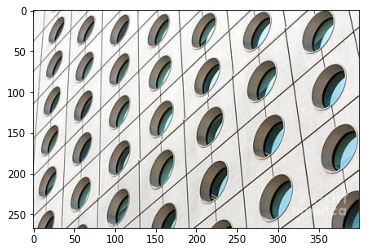

In [49]:
test_model(20)